# <font color='darkorange'>Prediction: Polynomial Regression
---
</font>

*@j*

Es un modelo que permite predecir variables continuas para estructuras de datos no lineales.

Problema: Predecir el valor de un automóvil según el modelo del mismo.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./autos.csv')
df.head()

,modelo,precio
0,2022,130000
1,2022,129000
2,2022,130000
3,2021,124000
4,2021,122000


Crear X:

In [3]:
X = df[['modelo']].values

Crear y:

In [4]:
y = df['precio'].values

Crear Splits:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, shuffle=True)
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size: ', X_test.shape,  y_test.shape)

Train set size: (109, 1) (109,)
Test set size:  (28, 1) (28,)


Crear modelo Polinomial:

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

modelPoly = LinearRegression()

Entrenar modelo:

In [7]:
modelPoly.fit(X_train_poly, y_train)

LinearRegression()

Realizar los test:

In [8]:
X_test_poly = poly.fit_transform(X_test)
y_hat = modelPoly.predict(X_test_poly)

Evaluar modelo:

In [9]:
from sklearn.metrics import r2_score

print(f'R2_Score: {round(r2_score(y_test, y_hat),2)*100} %')

R2_Score: 99.0 %


Realizar nuevas predicciones:

In [10]:
m1 = 2011
m2 = 2002

p1 = modelPoly.intercept_+ modelPoly.coef_[1]*m1+ modelPoly.coef_[2]*np.power(m1, 2)
p2 = modelPoly.intercept_+ modelPoly.coef_[1]*m2+ modelPoly.coef_[2]*np.power(m2, 2)

print(f'Para el modelo {m1} el precio sugerido es ${round(p1,0)}')
print(f'Para el modelo {m2} el precio sugerido es ${round(p2,0)}')

Para el modelo 2011 el precio sugerido es $76381.0
Para el modelo 2002 el precio sugerido es $44863.0


Gráfica de Regresión Polinomial:

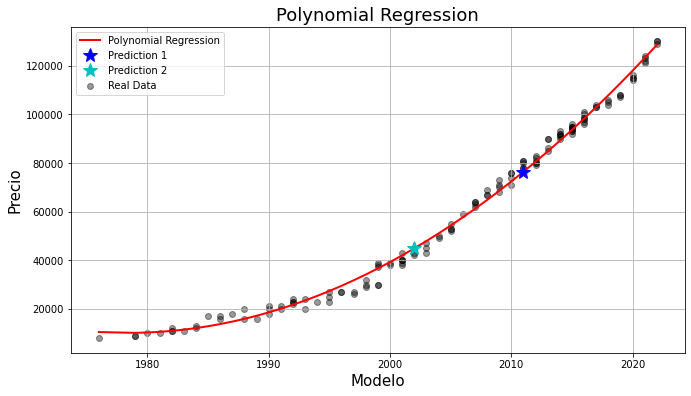

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))

data = plt.scatter(df.modelo, df.precio,  color='#000', alpha=.4)

polyreg = modelPoly.intercept_+ modelPoly.coef_[1]*df.modelo+ modelPoly.coef_[2]*np.power(df.modelo, 2)
plt.plot(df.modelo, polyreg, 'r' , linewidth=2)

pred1 = plt.plot(m1,p1,'b*', markersize=15)
pred2 = plt.plot(m2,p2,'c*', markersize=15)

plt.title("Polynomial Regression", fontdict={'size': 18})
plt.xlabel("Modelo", fontdict={'size': 15})
plt.ylabel("Precio", fontdict={'size': 15})
plt.legend(['Polynomial Regression', 'Prediction 1', 'Prediction 2', 'Real Data'])
plt.grid()
plt.show();

Comparación vs Regresión Lineal:

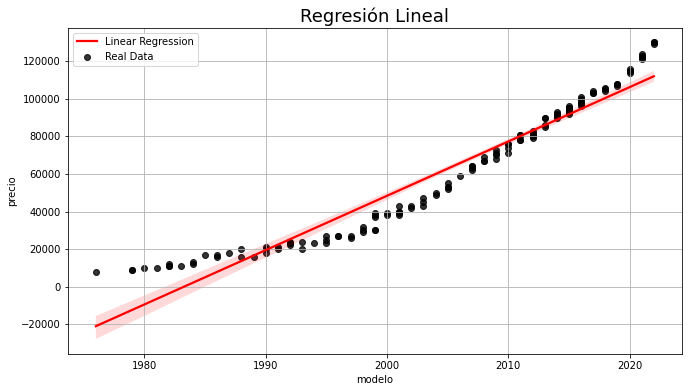

In [12]:
import seaborn as sns
plt.figure(figsize=(11,6))
sns.regplot(data=df, x=df.modelo, y=df.precio, scatter_kws={'color': 'black'}, line_kws={"color": "red"})
plt.title('Regresión Lineal', fontdict={'size': 18})
plt.grid()
plt.legend(['Linear Regression', 'Real Data'])
plt.show();